# Born to slide: mobile origin licensing factors confer resistance to transcription conflicts

<img style="float: left;" src="https://icons.iconarchive.com/icons/dan-wiersma/solar-system/48/Mars-icon.png">

## Jupyter notebooks 

#### Figures:
+ 3C
+ 3D
+ 3F
+ S3G
+ S3H
+ S3I

#### Archives:
+ Transcription_licensed-DNA_ATP_LS.yama
+ Transcription_licensed-DNA_ATP_HS.yama
+ Transcription_licensed-DNA_T7T_ATP.yama
+ Transcription_overlicensed-DNA_ATP_LS.yama
+ Transcription_overlicensed-DNA_ATP_HS.yama
+ Transcription_naked-DNA_ATP_LD555.yama
+ Transcription_naked-DNA_ATP_LD655.yama
+ Transcription_naked-DNA_ATP_AF488.yama
+ Transcription_ORC-DNA_ATP.yama
+ Transcription_naked-DNA_T7T_ATP.yama
+ Transcription_ORC-DNA_T7T_ATP.yama

#### Additional data:
+ none

### Initialize ImageJ

In [1]:
import imagej
ij = imagej.init('/Applications/Fiji.app')
ij.getVersion()

'2.1.0/1.53c'

### Imports

In [2]:
import sys
sys.path.insert(0, '..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import awesome_data
from marspy.convert.archive import DnaMoleculeArchive, instantiate_archive, describe_archives
from scipy.stats import norm
from tqdm.notebook import tqdm
from functools import reduce
from collections import Counter

marspy initialized.


### Select archives

In [3]:
selected_archives = ['Transcription_licensed-DNA_ATP_LS.yama',
                     'Transcription_licensed-DNA_ATP_HS.yama',
                     'Transcription_licensed-DNA_T7T_ATP.yama',
                     'Transcription_overlicensed-DNA_ATP_LS.yama',
                     'Transcription_overlicensed-DNA_ATP_HS.yama',
                     'Transcription_naked-DNA_ATP_LD555.yama',
                     'Transcription_naked-DNA_ATP_LD655.yama',
                     'Transcription_naked-DNA_ATP_AF488.yama',
                     'Transcription_ORC-DNA_ATP.yama',
                     'Transcription_naked-DNA_T7T_ATP.yama',
                     'Transcription_ORC-DNA_T7T_ATP.yama']

### Figure style and output directory

In [4]:
from figure_style import *

In [5]:
set_style_paper()

In [6]:
dir_out = '/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure3/'
dir_out

'/Volumes/pool-duderstadt/Matthias/Manuscript/Figures/SVGs/Figure3/'

### Instantiate selected archives

In [7]:
for archive in tqdm(selected_archives):
    instantiate_archive(archive, awesome_data.datasets)

cdc6 not found. Setting default to n/a
cdc6 not found. Setting default to n/a
cdc6 not found. Setting default to n/a
cdc6 not found. Setting default to n/a



### Archives Overview

In [8]:
describe_archives(DnaMoleculeArchive.instances)

,# of datasets,# of molecules,labeled proteins,nucleotide,HS challenge?,chromatin,terminator?,archive validation
Transcription_licensed-DNA_ATP_LS,1,245,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,n/a,False,passed
Transcription_licensed-DNA_ATP_HS,1,330,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,True,n/a,False,passed
Transcription_licensed-DNA_T7T_ATP,2,653,SNAP-AF488-T7; SORT-LD555-ORC; ybbR-LD655-MCM,ATP,False,n/a,True,passed
Transcription_overlicensed-DNA_ATP_LS,4,56,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,False,n/a,False,passed
Transcription_overlicensed-DNA_ATP_HS,3,9,ybbR-LD555-T7; ybbR-LD655-MCM,ATP,True,n/a,False,passed
Transcription_naked-DNA_ATP_LD555,6,303,ybbR-LD555-T7,ATP,False,n/a,False,passed
Transcription_naked-DNA_ATP_LD655,1,281,ybbR-LD655-T7,ATP,False,n/a,False,passed
Transcription_naked-DNA_ATP_AF488,1,129,SNAP-AF488-T7,ATP,False,n/a,False,passed
Transcription_ORC-DNA_ATP,1,206,SORT-LD555-ORC; ybbR-LD655-T7,ATP,False,n/a,False,passed
Transcription_naked-DNA_T7T_ATP,1,325,ybbR-LD655-T7,ATP,False,n/a,True,passed


### Load segment tables, apply filter & detect pauses

In [9]:
for index,archive in enumerate(tqdm(DnaMoleculeArchive.instances)):
    
    archive.add_segments_tables()
    archive.filter_segments(b_min=-10, sigma_b_max=10)
    archive.detect_pauses()


### Generate main df

In [10]:
def setup_pandas_df(archive_instances):
    '''
    Sets up a multilevel df with all relevant information
    '''
    
    # indices will be UIDs
    prefixes = set()
    for archive in DnaMoleculeArchive.instances:
        prefixes.update(archive.prefixes)
    col_1 = sorted(list(prefixes))
    #inside
    col_2 = ['initial_intensity', 'lifetime', 'start_site', 'stop_site', 'number_pauses']
    col_3 = ['']
    hier_index = pd.MultiIndex.from_product([col_1,col_2,col_3],names=['molecule','properties','properties_details'])

    return pd.DataFrame(columns=hier_index)
    

In [11]:
df = setup_pandas_df(DnaMoleculeArchive.instances)

# sort MultiIndexCols for performance
df.sort_index(axis=1, inplace=True)
df.head()


Empty DataFrame
Columns: [(MCM_1_, initial_intensity, ), (MCM_1_, lifetime, ), (MCM_1_, number_pauses, ), (MCM_1_, start_site, ), (MCM_1_, stop_site, ), (MCM_2_, initial_intensity, ), (MCM_2_, lifetime, ), (MCM_2_, number_pauses, ), (MCM_2_, start_site, ), (MCM_2_, stop_site, ), (MCM_3_, initial_intensity, ), (MCM_3_, lifetime, ), (MCM_3_, number_pauses, ), (MCM_3_, start_site, ), (MCM_3_, stop_site, ), (ORC_1_, initial_intensity, ), (ORC_1_, lifetime, ), (ORC_1_, number_pauses, ), (ORC_1_, start_site, ), (ORC_1_, stop_site, ), (ORC_2_, initial_intensity, ), (ORC_2_, lifetime, ), (ORC_2_, number_pauses, ), (ORC_2_, start_site, ), (ORC_2_, stop_site, ), (T7_1_, initial_intensity, ), (T7_1_, lifetime, ), (T7_1_, number_pauses, ), (T7_1_, start_site, ), (T7_1_, stop_site, )]
Index: []

[0 rows x 30 columns]

In [12]:
# fill dataframe
for archive in tqdm(DnaMoleculeArchive.instances):

    for molecule in archive.molecules:
        #print('handling molecule '+molecule.uid)
        # general columns first
        df.loc[molecule.uid,'dna_length'] = molecule.calc_length_dna()
        df.loc[molecule.uid,'dna_count_valid'] = archive.dna_count_valid
        df.loc[molecule.uid,'hs_wash'] = archive.highsalt_wash
        df.loc[molecule.uid,'nucleotide'] = archive.nucleotide
        df.loc[molecule.uid,'t7_terminator'] = archive.t7_terminator
        df.loc[molecule.uid,'tags'] = reduce(lambda tag1,tag2: tag1+','+tag2, molecule.tags)

        # general proteins
        for protein in molecule.proteins:
            #store protein number
            df.loc[molecule.uid,'number_'+protein] = molecule.params['Number_'+protein]
            #assign label for each protein
            df.loc[molecule.uid,'label_'+protein] = archive.labels[protein]
            
            # burst velocity (weighted average, exclude pauses, all regions)
            # always calculate weighted average for all seg_dfs of a protein
            # check if protein has a SegmentsTable, otherwise skip
            if len(list(filter(lambda seg_df: protein in seg_df.prefix, molecule.seg_dfs))) > 0:
                df.loc[molecule.uid,('velocity_'+protein)] = \
                np.average([seg_df.calc_rate()[0] for seg_df in list(filter(lambda seg_df: protein in seg_df.prefix, molecule.seg_dfs))],
                           weights=[seg_df.calc_rate()[1] for seg_df in list(filter(lambda seg_df: protein in seg_df.prefix, molecule.seg_dfs))])
        
        # every specific protein
        for prefix in molecule.prefixes:

            #take mean intensity from first 5 frames (maybe need try block later if shorter traces)
            df.loc[molecule.uid,(prefix,'initial_intensity')] = molecule.df.iloc[:5][prefix+'Intensity'].mean()

            #lifetime (in frames) defined on tracking length
            df.loc[molecule.uid,(prefix,'lifetime')] = len(molecule.df[prefix+'y'].dropna())
            
            #start & stop site
            if re.match('T7',prefix):
                df.loc[molecule.uid,(prefix,'start_site')] = molecule.df[prefix+'Position_on_DNA'].min()
                df.loc[molecule.uid,(prefix,'stop_site')] = molecule.df[prefix+'Position_on_DNA'].max()
            elif re.match('MCM',prefix):
                df.loc[molecule.uid,(prefix,'start_site')] = molecule.df.iloc[:5][prefix+'Position_on_DNA'].mean()
                df.loc[molecule.uid,(prefix,'stop_site')] = molecule.df[prefix+'Position_on_DNA'].max()
            
            #pauses:
            #number of pauses
            #- do not consider first segment (transcription stalling before UTP arrival)
            #- do not consider pauses above 19 kb on DNA (exclude diffraction limit towards end of DNA = 1.5-2kb)
            #- do not consider pauses with less than 20 seconds (x2-x1)
            
            #note: following is split up in multiple lines to avoid long arguments and reusage
            #save as temporal variable (already exclude exclude first segment of each segment table (index 0 stays in concatenated))
            # check if protein prefix has a SegmentsTable, otherwise skip
            if len(list(filter(lambda seg_df: prefix == seg_df.prefix, molecule.seg_dfs))) > 0:
                _seg_df = pd.concat([seg_df.df for seg_df in list(filter(lambda seg_df: prefix == seg_df.prefix, molecule.seg_dfs))]).drop(0,axis=0)
                # reset index for proper loops by index later
                _seg_df.reset_index(drop=True, inplace=True)
                # filter df based on pause definition (keep all segments which are not a pause for recovery)
                _seg_df = _seg_df[(_seg_df['x2'] - _seg_df['x1'] >= 20) & 
                                  (_seg_df['y2'] < 19000) & (_seg_df['y1'] < 19000) | 
                                  (_seg_df['pause_B'] == False)]
                             
            
                df.loc[molecule.uid,(prefix,'number_pauses')] = _seg_df['pause_B'].sum()
            
                #loop through filtered _seg_df to get pause details:
                pause_counter = 0
                for row in _seg_df.index:
                    #do we have a pause segment?
                    if _seg_df.loc[row,'pause_B']:
                        pause_counter+=1

                        # pause duration (endtime - starttime: x2-x1)
                        df.loc[molecule.uid,(prefix,'pause_'+str(pause_counter),'duration')] = \
                        _seg_df.loc[row,'x2'] - _seg_df.loc[row,'x1']

                        # pause position on dna (mean of start and end: y2-y1)
                        df.loc[molecule.uid,(prefix,'pause_'+str(pause_counter),'position_on_dna')] = \
                        (_seg_df.loc[row,'y2'] + _seg_df.loc[row,'y1']) / 2

                        # does it recover from pause (=> is it the last segment)
                        # note: concatenated df is perfect because subsequent region can show pause recovery
                        df.loc[molecule.uid,(prefix,'pause_'+str(pause_counter),'recovery')] = \
                        row != _seg_df.index.max()

                # sanity check between pause_counter and earlier detected pauses
                # [0] necessary because of multi-index. use .xs() alternatively
                if pause_counter != df.loc[molecule.uid,(prefix,'number_pauses')][0]:
                    print(f"Attention! Problem with pause detection in molecule {molecule.uid}.")           

# fill all NaN values in number_protein with 0
proteins = set()
for archive in DnaMoleculeArchive.instances:
    proteins.update(archive.proteins)

for protein in proteins:
    df['number_'+protein] = df['number_'+protein].apply(lambda value: 0 if np.isnan(value) else value)
                    
# convert tags back to list
df['tags'] = df['tags'].apply(lambda tags: tags.split(','))

# again sort MultiIndexCols for performance
df.sort_index(axis=1, inplace=True)

# fix data types
df = df.infer_objects()


/Users/matze/anaconda3/envs/scijava/lib/python3.7/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/Users/matze/anaconda3/envs/scijava/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [13]:
df.head()

molecule                          MCM_1_                                  \
properties             initial_intensity lifetime number_pauses  pause_1   
properties_details                                              duration   
tt6fhtfZG756vaP8naXmT8           53390.6    150.0           NaN      NaN   
8jCyrcDPJSf24W1YFSKGph           87420.6    149.0           1.0  385.151   
9sDdELLnQKWDxdxr1u9jxH           24604.9    150.0           NaN      NaN   
uRNaXRjwYD5oPgxJ3EGLox           61938.8    150.0           NaN      NaN   
wpHhv4pYN6AfEZKothLud           354843.9    150.0           NaN      NaN   

molecule                                                                  \
properties                                       pause_2                   
properties_details     position_on_dna recovery duration position_on_dna   
tt6fhtfZG756vaP8naXmT8             NaN      NaN      NaN             NaN   
8jCyrcDPJSf24W1YFSKGph    10539.005815     True      NaN             NaN   
9sDdELLnQKWDxdxr1u9jxH             NaN      NaN      NaN             NaN   
uRNaXRjwYD5oPgxJ3EGLox             NaN      NaN      NaN             NaN   
wpHhv4pYN6AfEZKothLud              NaN      NaN      NaN             NaN   

molecule                                       ...    label_T7 nucleotide  \
properties                         start_site  ...                          
properties_details     recovery                ...                          
tt6fhtfZG756vaP8naXmT8      NaN   4180.908073  ...  ybbR-LD555        ATP   
8jCyrcDPJSf24W1YFSKGph      NaN   5611.080259  ...  ybbR-LD555        ATP   
9sDdELLnQKWDxdxr1u9jxH      NaN   5113.158198  ...  ybbR-LD555        ATP   
uRNaXRjwYD5oPgxJ3EGLox      NaN  15235.802491  ...  ybbR-LD555        ATP   
wpHhv4pYN6AfEZKothLud       NaN  16292.670529  ...  ybbR-LD555        ATP   

molecule               number_MCM number_ORC number_T7 t7_terminator  \
properties                                                             
properties_details                                                     
tt6fhtfZG756vaP8naXmT8        1.0        0.0       0.0         False   
8jCyrcDPJSf24W1YFSKGph        1.0        0.0       1.0         False   
9sDdELLnQKWDxdxr1u9jxH        1.0        0.0       0.0         False   
uRNaXRjwYD5oPgxJ3EGLox        2.0        0.0       0.0         False   
wpHhv4pYN6AfEZKothLud         2.0        0.0       0.0         False   

molecule                                           tags velocity_MCM  \
properties                                                             
properties_details                                                     
tt6fhtfZG756vaP8naXmT8                         [accept]          NaN   
8jCyrcDPJSf24W1YFSKGph  [accept, coloc_T7_1_MCM_1_push]    50.891824   
9sDdELLnQKWDxdxr1u9jxH                         [accept]          NaN   
uRNaXRjwYD5oPgxJ3EGLox                         [accept]          NaN   
wpHhv4pYN6AfEZKothLud                          [accept]          NaN   

molecule               velocity_ORC velocity_T7  
properties                                       
properties_details                               
tt6fhtfZG756vaP8naXmT8          NaN         NaN  
8jCyrcDPJSf24W1YFSKGph          NaN   51.359712  
9sDdELLnQKWDxdxr1u9jxH          NaN         NaN  
uRNaXRjwYD5oPgxJ3EGLox          NaN         NaN  
wpHhv4pYN6AfEZKothLud           NaN         NaN  

[5 rows x 60 columns]

## Figures

### Figure 3C: RNAP pushes MCM DHs over long distances
*Note*: only consider DNA w/o T7T

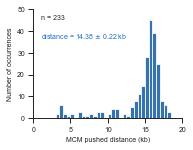

In [14]:
protein = 'MCM'
# only consider molecules with 1 MCM foci being pushed
tag_filter = 'MCM_1_push'

_plot_df = (df[(~df['t7_terminator']) & (df['number_MCM'] == 1) & (df['tags'].apply(
    lambda tags: True if re.search(tag_filter,' '.join(tags)) else False))].filter(regex=(protein+"_"),axis=1))

fig,axes = plt.subplots()

sns.distplot((_plot_df.xs('stop_site',level='properties',axis=1) -
              _plot_df.xs('start_site',level='properties',axis=1))/1000,ax=axes,
             color=sns.desaturate(palettes[protein][1],0.75),bins = np.linspace(0, 25, 51),kde=False,hist_kws={'alpha':1})
# mean+/- sem
mean_distance = pd.melt((_plot_df.xs('stop_site',level='properties',axis=1) - 
                         _plot_df.xs('start_site',level='properties',axis=1))/1000)['value'].mean()
sem_distance = pd.melt((_plot_df.xs('stop_site',level='properties',axis=1) - 
                         _plot_df.xs('start_site',level='properties',axis=1))/1000)['value'].sem()
axes.text(0.05, 0.8, f"distance = {round(mean_distance,2)} $\pm$ {round(sem_distance,2)} kb",
        verticalalignment='top', horizontalalignment='left',
        transform=axes.transAxes,color=palettes[protein][1])

axes.set_xlim(0,20)
axes.set_ylim(0,50)
axes.set_xlabel('MCM pushed distance (kb)')
axes.set_ylabel('Number of occurrences')
#axes.axvline(16)
#axes.legend(loc=0,frameon=False)

axes.text(0.05, 0.95, f"n = {len(_plot_df)}",
        verticalalignment='top', horizontalalignment='left',
        transform=axes.transAxes)

sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'3C_MCM-DH_pushed_distance.svg',transparent=True)

### Figure 3D: Collision outcomes RNAP-MCM DHs
*Note*: only consider collisions in absence of ORC and archives with valid DNA count

In [15]:
colls_LS = list()
colls_HS = list()

for archive in filter(lambda archive: archive.dna_count_valid, DnaMoleculeArchive.instances):
    for molecule in archive.molecules:
        for tag in filter(lambda tag: 'coll_T7_1_MCM_' in tag, molecule.tags):
            if archive.highsalt_wash:
                colls_HS.append(tag.split('_')[-1])
            else:
                colls_LS.append(tag.split('_')[-1])

df_coll = pd.DataFrame(index=[False, True],data=([Counter(colls_LS),Counter(colls_HS)])).T
df_coll.columns.names = ['hs_challenge']
df_coll

hs_challenge,False,True
push,168,67
stall,7,3
T7eject,27,13
pause,2,2


In [16]:
df_coll = df_coll.reindex(['push', 'pause', 'stall', 'T7eject'])
df_coll

hs_challenge,False,True
push,168,67
pause,2,2
stall,7,3
T7eject,27,13


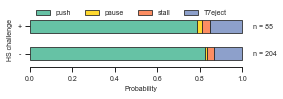

In [17]:
#plot a stacked barplot
fig,axes = plt.subplots(figsize=(4,1))

(df_coll/df_coll.sum()).T.plot(kind='barh',stacked=True,ax=axes,rot=0,edgecolor='.15',
                               color=[palettes['qualitative'][0],palettes['qualitative'][5],
                                      palettes['qualitative'][1],palettes['qualitative'][2]])
axes.set_xlabel("Probability")
axes.set_ylabel("HS challenge")
#axes.set_title("Fate upon T7RNAP-MCM collision")
axes.set_xlim([0,1.05])
axes.set_yticklabels(['-','+'])


labels = [int(df_coll.sum()[col]) for col in df_coll.columns]

#calculate y offset to label bars on top

rects = axes.patches
counter = 0
for rect, label in zip(rects, labels):
    axes.text(1.05, rect.get_y() + rect.get_height()/2, s=f'n = {label}', ha='left', va='center')
    counter+=1
axes.legend(ncol=len(df.index),bbox_to_anchor=[0, 1], loc='center left',frameon=False)
#tidy up
#fig.tight_layout()
sns.despine(trim=True,left=True)

#save
plt.savefig(dir_out+'3D_T7-MCM_collision_fate.svg',transparent=True)


### Figure 3F: RNAP can readily push multiple MCM DHs

In [18]:
df_push = pd.DataFrame(columns=['initial_intensity','velocity'])

# loop through all archives with nucleotide ATP (just sanity check, only "ATP archives selected")
for archive in filter(lambda archive: archive.nucleotide == 'ATP',DnaMoleculeArchive.instances):
#for archive in [archive0,archive1,archive4,archive5]:
    # loop through all molecules
    for molecule in archive.molecules:
        valid = True
        
        for protein, number in molecule.proteins.items():
            # make sure molecule only contains MCM & T7 
            if (number > 0 and protein not in {'T7', 'MCM'}):
                valid = False
                continue
            # more than 1 T7 (just a sanity check, shouldn't happen)
            elif number > 1 and protein != 'MCM':
                valid = False
                continue
                
        # loop through all seg_dfs with MCM in prefix
        if valid:
            for seg_df in filter(lambda seg_df: 'MCM' in seg_df.prefix, molecule.seg_dfs):
                # get the rate
                velocity = seg_df.calc_rate()[0]

                # get intensity_MCM
                intensity = 0
                # add intensities for all pushed MCMs
                for i in range(1,seg_df.pushed_proteins['MCM']+1):
                    intensity += molecule.df.iloc[:5]['MCM_'+str(i)+'_Intensity'].mean()

                _temp_df = pd.DataFrame(data=[[intensity,velocity]],
                                        columns=['initial_intensity','velocity'])
                df_push = pd.concat([df_push,_temp_df])
                
            # in case we have no MCM, take T7 velocity and add MCM intensity 0
            if len(list(filter(lambda seg_df: 'MCM' in seg_df.prefix, molecule.seg_dfs))) == 0:
                for seg_df in filter(lambda seg_df: 'T7' in seg_df.prefix, molecule.seg_dfs):
                    # get the rate
                    velocity = seg_df.calc_rate()[0]

                    # set MCM intensity to 0
                    intensity = 0
                    _temp_df = pd.DataFrame(data=[[intensity,velocity]],
                                            columns=['initial_intensity','velocity'])
                    df_push = pd.concat([df_push,_temp_df])
                
df_push = df_push.convert_dtypes()
df_push = df_push.dropna()
df_push

,initial_intensity,velocity
0,87420.6,50.891824
0,0.0,55.836489
0,33184.5,56.237274
0,30658.6,57.450612
0,43462.3,41.670266
...,...,...
0,0.0,58.251796
0,0.0,59.341375
0,0.0,58.296173
0,0.0,60.552408


In [19]:
df_push.corr()

,initial_intensity,velocity
initial_intensity,1.00000,-0.44466
velocity,-0.44466,1.00000


In [20]:
# 1 MCM has around 15000 intensity
def estimate_bleaching(intensity):
    if intensity == 0:
        return '0'
    elif intensity < 40000:
        return '1'
    elif intensity < 72000:
        return '2'
    elif intensity < 102857:
        return '3'
    elif intensity < 133333:
        return '4'
    else:
        return '>=5'

In [21]:
df_push['number_MCM_DH'] = df_push['initial_intensity'].apply(estimate_bleaching)

In [22]:
df_push.groupby('number_MCM_DH').describe()

initial_intensity                                         \
                          count           mean           std       min   
number_MCM_DH                                                            
0                        1449.0       0.000000      0.000000       0.0   
1                         192.0   26691.416667   8178.070671    6912.0   
2                         203.0   54938.998522   9212.924633   40128.1   
3                          76.0   85425.242105   9608.542542   72003.2   
4                          34.0  113640.808824   8744.214438  102871.9   
>=5                        17.0  161070.035294  33918.307605  133900.8   

                                                          velocity             \
                     25%        50%         75%       max    count       mean   
number_MCM_DH                                                                   
0                   0.00       0.00       0.000       0.0   1449.0  56.998526   
1               21836.45   27712.30   32660.825   39949.2    192.0  55.138364   
2               47039.25   54087.70   62391.050   71849.4    203.0  50.631592   
3               76477.60   83882.75   94225.275  102839.8     76.0  48.844475   
4              106329.35  111399.80  117681.700  132158.4     34.0  47.152461   
>=5            140573.40  147963.50  159106.500  239250.0     17.0  44.036565   

                                                                                
                    std        min        25%        50%        75%        max  
number_MCM_DH                                                                   
0              5.713906   6.945447  54.523721  57.416068  60.023474  84.736766  
1              5.176294  34.047568  52.976265  56.171495  58.408082  68.362355  
2              6.003399  27.027475  47.787696  51.620430  54.135466  67.882966  
3              5.319906  30.951195  46.772969  49.489678  51.737958  58.320523  
4              5.635131  35.037034  45.424201  47.264010  50.488267  58.560023  
>=5            6.943967  25.749253  41.610075  44.555326  47.459353  55.601820

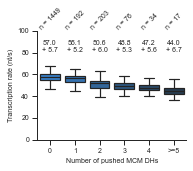

In [23]:
# Number of MCM DH vs observed rates
protein = 'MCM'
fig,axes = plt.subplots()

sns.boxplot(x='number_MCM_DH',y='velocity',data=df_push,order=sorted(df_push['number_MCM_DH'].unique()),
            palette=palettes[protein],fliersize=0)


#calculate number of observations
nobs = df_push['number_MCM_DH'].value_counts().sort_index()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

#put nobs into plot

pos = range(len(nobs))

for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text(pos[tick], 100, nobs[tick], rotation = 45,
    horizontalalignment='center',verticalalignment='bottom')
    
rates = []
# fit data to normal distribution and print on plot
for num_mcm in sorted(df_push['number_MCM_DH'].unique()):
    mu, std = norm.fit(df_push[df_push['number_MCM_DH']==num_mcm]['velocity'])
    rates.append(f'{round(mu,1)}\n+ {round(std,1)}')
    
for tick,label in zip(pos,axes.get_xticklabels()):
    axes.text(pos[tick], 80, rates[tick],
    horizontalalignment='center',verticalalignment='bottom')

axes.set_ylim(0,100)
axes.set_xlabel('Number of pushed MCM DHs')
axes.set_ylabel('Transcription rate (nt/s)')

# axes.set_title('T7 RNAP can push trains of MCM DHs')

sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'3F_Transcription_rates_vs_#MCM-DH.svg',transparent=True)

### Figure S3G: Pausing probability during transcription
*Note*: only consider DNA w/o T7T, one MCM foci and only active pushing (pauses upon T7-MCM collision are not accounted for)

In [24]:
# 1st part, df with MCM == 1, ORC == 0, no T7T, and tags contain MCM_1_push
df_mcm = df[(~df['t7_terminator']) & (df['number_MCM'] == 1) & (df['number_ORC'] == 0) & 
            (df['tags'].apply(lambda tags: re.search('MCM_1_push', ' '.join(tags))))]['MCM_1_']
df_mcm

properties             initial_intensity lifetime number_pauses  pause_1  \
properties_details                                              duration   
8jCyrcDPJSf24W1YFSKGph           87420.6    149.0           1.0  385.151   
osEhwwPsHB6JY7YYanMd5G           33184.5    150.0           0.0      NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG           30658.6    147.0           0.0      NaN   
u4TRXuWkPhGNY8C4mvcPUj           43462.3    150.0           1.0  715.831   
s3gr6FMkLCz75PdFpQ9Qsu           97323.5    150.0           0.0      NaN   
...                                  ...      ...           ...      ...   
h79Wcq96qYpJywYip5zjv7           21848.5    149.0           0.0      NaN   
nskCj9QE27Zg6WE9WHXXsc           47295.4    150.0           1.0  581.120   
ofGSZ68d8KtKSExYtCRR7v          143545.8    150.0           0.0      NaN   
7U1UqpsASvjc699n6MR6jq           26443.3     62.0           0.0      NaN   
65xjbuqnJhks1EKkJgJC2q           47098.3    150.0           0.0      NaN   

properties                                       pause_2                  \
properties_details     position_on_dna recovery duration position_on_dna   
8jCyrcDPJSf24W1YFSKGph    10539.005815     True      NaN             NaN   
osEhwwPsHB6JY7YYanMd5G             NaN      NaN      NaN             NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG             NaN      NaN      NaN             NaN   
u4TRXuWkPhGNY8C4mvcPUj     6813.793959    False      NaN             NaN   
s3gr6FMkLCz75PdFpQ9Qsu             NaN      NaN      NaN             NaN   
...                                ...      ...      ...             ...   
h79Wcq96qYpJywYip5zjv7             NaN      NaN      NaN             NaN   
nskCj9QE27Zg6WE9WHXXsc    16802.051279    False      NaN             NaN   
ofGSZ68d8KtKSExYtCRR7v             NaN      NaN      NaN             NaN   
7U1UqpsASvjc699n6MR6jq             NaN      NaN      NaN             NaN   
65xjbuqnJhks1EKkJgJC2q             NaN      NaN      NaN             NaN   

properties                        start_site     stop_site  
properties_details     recovery                             
8jCyrcDPJSf24W1YFSKGph      NaN  5611.080259  20946.146437  
osEhwwPsHB6JY7YYanMd5G      NaN  5308.922517  21204.567547  
3Nq8cJZ8TNkKmJBBZ5cPtG      NaN  7026.109525  21061.069325  
u4TRXuWkPhGNY8C4mvcPUj      NaN  3866.890303   7298.428415  
s3gr6FMkLCz75PdFpQ9Qsu      NaN  3640.926976  20546.604920  
...                         ...          ...           ...  
h79Wcq96qYpJywYip5zjv7      NaN  4931.761804  20677.968289  
nskCj9QE27Zg6WE9WHXXsc      NaN  5679.777282  17153.562479  
ofGSZ68d8KtKSExYtCRR7v      NaN  5485.080492  21099.697735  
7U1UqpsASvjc699n6MR6jq      NaN  5171.908096  21463.701813  
65xjbuqnJhks1EKkJgJC2q      NaN  6829.573963  21868.980169  

[233 rows x 11 columns]

In [25]:
# 2nd part, df with MCM == 0, ORC == 0, no T7T and T7 ==1
df_t7 = df[(~df['t7_terminator']) & (df['number_T7'] == 1) & (df['number_MCM'] == 0) & (df['number_ORC'] == 0)]['T7_1_']
df_t7['initial_intensity'] = 0
df_t7

properties             initial_intensity lifetime number_pauses  pause_1  \
properties_details                                              duration   
o4wJqtFp3wELDhqtHhCisK                 0     72.0           0.0      NaN   
s1zeeGCZznEiZzj368rBc4                 0     30.0           0.0      NaN   
fC6znsfCWektjiDPBS2Bdr                 0     32.0           0.0      NaN   
pEubv3RJbHboz5N6oWaawu                 0     37.0           1.0   41.170   
a4BJ5GxVitK27aUnfxtJ1Q                 0    150.0           1.0  506.800   
...                                  ...      ...           ...      ...   
b7Q48ne6N728J4fLy6sceD                 0    148.0           1.0  608.471   
pdhobLtQjYNAUbhyMHwK6H                 0     90.0           1.0  144.580   
62NMEVdj1hZNMVTLCXK4HZ                 0     63.0           0.0      NaN   
qSdCveaoB56dGjzNPbaKGs                 0     62.0           0.0      NaN   
KAasBGEU5cGbKzzykGSLJ                  0     84.0           1.0  126.210   

properties                                       pause_2                  \
properties_details     position_on_dna recovery duration position_on_dna   
o4wJqtFp3wELDhqtHhCisK             NaN      NaN      NaN             NaN   
s1zeeGCZznEiZzj368rBc4             NaN      NaN      NaN             NaN   
fC6znsfCWektjiDPBS2Bdr             NaN      NaN      NaN             NaN   
pEubv3RJbHboz5N6oWaawu    12354.259366    False      NaN             NaN   
a4BJ5GxVitK27aUnfxtJ1Q     9449.086729     True      NaN             NaN   
...                                ...      ...      ...             ...   
b7Q48ne6N728J4fLy6sceD    10950.750545    False      NaN             NaN   
pdhobLtQjYNAUbhyMHwK6H    18270.241341     True      NaN             NaN   
62NMEVdj1hZNMVTLCXK4HZ             NaN      NaN      NaN             NaN   
qSdCveaoB56dGjzNPbaKGs             NaN      NaN      NaN             NaN   
KAasBGEU5cGbKzzykGSLJ     16906.676481     True      NaN             NaN   

properties                        start_site     stop_site  
properties_details     recovery                             
o4wJqtFp3wELDhqtHhCisK      NaN  3400.976459  21564.097645  
s1zeeGCZznEiZzj368rBc4      NaN  2995.807344  10844.762471  
fC6znsfCWektjiDPBS2Bdr      NaN  2666.710710   9072.272478  
pEubv3RJbHboz5N6oWaawu      NaN  4505.882104  12583.750377  
a4BJ5GxVitK27aUnfxtJ1Q      NaN  3412.670426  20882.561458  
...                         ...          ...           ...  
b7Q48ne6N728J4fLy6sceD      NaN  3266.927063  11466.766043  
pdhobLtQjYNAUbhyMHwK6H      NaN  3318.257859  21589.061224  
62NMEVdj1hZNMVTLCXK4HZ      NaN  3412.723895  21834.406868  
qSdCveaoB56dGjzNPbaKGs      NaN  3295.579326  21747.149178  
KAasBGEU5cGbKzzykGSLJ       NaN  3544.868177  21025.078583  

[779 rows x 11 columns]

In [26]:
df_pause = pd.concat([df_mcm, df_t7])
df_pause

properties             initial_intensity lifetime number_pauses  pause_1  \
properties_details                                              duration   
8jCyrcDPJSf24W1YFSKGph           87420.6    149.0           1.0  385.151   
osEhwwPsHB6JY7YYanMd5G           33184.5    150.0           0.0      NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG           30658.6    147.0           0.0      NaN   
u4TRXuWkPhGNY8C4mvcPUj           43462.3    150.0           1.0  715.831   
s3gr6FMkLCz75PdFpQ9Qsu           97323.5    150.0           0.0      NaN   
...                                  ...      ...           ...      ...   
b7Q48ne6N728J4fLy6sceD               0.0    148.0           1.0  608.471   
pdhobLtQjYNAUbhyMHwK6H               0.0     90.0           1.0  144.580   
62NMEVdj1hZNMVTLCXK4HZ               0.0     63.0           0.0      NaN   
qSdCveaoB56dGjzNPbaKGs               0.0     62.0           0.0      NaN   
KAasBGEU5cGbKzzykGSLJ                0.0     84.0           1.0  126.210   

properties                                       pause_2                  \
properties_details     position_on_dna recovery duration position_on_dna   
8jCyrcDPJSf24W1YFSKGph    10539.005815     True      NaN             NaN   
osEhwwPsHB6JY7YYanMd5G             NaN      NaN      NaN             NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG             NaN      NaN      NaN             NaN   
u4TRXuWkPhGNY8C4mvcPUj     6813.793959    False      NaN             NaN   
s3gr6FMkLCz75PdFpQ9Qsu             NaN      NaN      NaN             NaN   
...                                ...      ...      ...             ...   
b7Q48ne6N728J4fLy6sceD    10950.750545    False      NaN             NaN   
pdhobLtQjYNAUbhyMHwK6H    18270.241341     True      NaN             NaN   
62NMEVdj1hZNMVTLCXK4HZ             NaN      NaN      NaN             NaN   
qSdCveaoB56dGjzNPbaKGs             NaN      NaN      NaN             NaN   
KAasBGEU5cGbKzzykGSLJ     16906.676481     True      NaN             NaN   

properties                        start_site     stop_site  
properties_details     recovery                             
8jCyrcDPJSf24W1YFSKGph      NaN  5611.080259  20946.146437  
osEhwwPsHB6JY7YYanMd5G      NaN  5308.922517  21204.567547  
3Nq8cJZ8TNkKmJBBZ5cPtG      NaN  7026.109525  21061.069325  
u4TRXuWkPhGNY8C4mvcPUj      NaN  3866.890303   7298.428415  
s3gr6FMkLCz75PdFpQ9Qsu      NaN  3640.926976  20546.604920  
...                         ...          ...           ...  
b7Q48ne6N728J4fLy6sceD      NaN  3266.927063  11466.766043  
pdhobLtQjYNAUbhyMHwK6H      NaN  3318.257859  21589.061224  
62NMEVdj1hZNMVTLCXK4HZ      NaN  3412.723895  21834.406868  
qSdCveaoB56dGjzNPbaKGs      NaN  3295.579326  21747.149178  
KAasBGEU5cGbKzzykGSLJ       NaN  3544.868177  21025.078583  

[1012 rows x 11 columns]

In [27]:
# 1 MCM has around 15000 intensity
def estimate_bleaching2(intensity):
    if intensity == 0:
        return '0'
    elif intensity < 40000:
        return '1'
    elif intensity < 72000:
        return '2'
    else:
        return '>=3'

In [28]:
df_pause['number_MCM_DH'] = df_pause['initial_intensity'].apply(estimate_bleaching2)
df_pause

properties             initial_intensity lifetime number_pauses  pause_1  \
properties_details                                              duration   
8jCyrcDPJSf24W1YFSKGph           87420.6    149.0           1.0  385.151   
osEhwwPsHB6JY7YYanMd5G           33184.5    150.0           0.0      NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG           30658.6    147.0           0.0      NaN   
u4TRXuWkPhGNY8C4mvcPUj           43462.3    150.0           1.0  715.831   
s3gr6FMkLCz75PdFpQ9Qsu           97323.5    150.0           0.0      NaN   
...                                  ...      ...           ...      ...   
b7Q48ne6N728J4fLy6sceD               0.0    148.0           1.0  608.471   
pdhobLtQjYNAUbhyMHwK6H               0.0     90.0           1.0  144.580   
62NMEVdj1hZNMVTLCXK4HZ               0.0     63.0           0.0      NaN   
qSdCveaoB56dGjzNPbaKGs               0.0     62.0           0.0      NaN   
KAasBGEU5cGbKzzykGSLJ                0.0     84.0           1.0  126.210   

properties                                       pause_2                  \
properties_details     position_on_dna recovery duration position_on_dna   
8jCyrcDPJSf24W1YFSKGph    10539.005815     True      NaN             NaN   
osEhwwPsHB6JY7YYanMd5G             NaN      NaN      NaN             NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG             NaN      NaN      NaN             NaN   
u4TRXuWkPhGNY8C4mvcPUj     6813.793959    False      NaN             NaN   
s3gr6FMkLCz75PdFpQ9Qsu             NaN      NaN      NaN             NaN   
...                                ...      ...      ...             ...   
b7Q48ne6N728J4fLy6sceD    10950.750545    False      NaN             NaN   
pdhobLtQjYNAUbhyMHwK6H    18270.241341     True      NaN             NaN   
62NMEVdj1hZNMVTLCXK4HZ             NaN      NaN      NaN             NaN   
qSdCveaoB56dGjzNPbaKGs             NaN      NaN      NaN             NaN   
KAasBGEU5cGbKzzykGSLJ     16906.676481     True      NaN             NaN   

properties                        start_site     stop_site number_MCM_DH  
properties_details     recovery                                           
8jCyrcDPJSf24W1YFSKGph      NaN  5611.080259  20946.146437           >=3  
osEhwwPsHB6JY7YYanMd5G      NaN  5308.922517  21204.567547             1  
3Nq8cJZ8TNkKmJBBZ5cPtG      NaN  7026.109525  21061.069325             1  
u4TRXuWkPhGNY8C4mvcPUj      NaN  3866.890303   7298.428415             2  
s3gr6FMkLCz75PdFpQ9Qsu      NaN  3640.926976  20546.604920           >=3  
...                         ...          ...           ...           ...  
b7Q48ne6N728J4fLy6sceD      NaN  3266.927063  11466.766043             0  
pdhobLtQjYNAUbhyMHwK6H      NaN  3318.257859  21589.061224             0  
62NMEVdj1hZNMVTLCXK4HZ      NaN  3412.723895  21834.406868             0  
qSdCveaoB56dGjzNPbaKGs      NaN  3295.579326  21747.149178             0  
KAasBGEU5cGbKzzykGSLJ       NaN  3544.868177  21025.078583             0  

[1012 rows x 12 columns]

In [29]:
df_pause.groupby('number_MCM_DH').describe()['number_pauses']

properties_details                                                    
                    count      mean       std  min  25%  50%  75%  max
number_MCM_DH                                                         
0                   779.0  0.125802  0.350672  0.0  0.0  0.0  0.0  2.0
1                   131.0  0.229008  0.473366  0.0  0.0  0.0  0.0  2.0
2                    70.0  0.328571  0.502787  0.0  0.0  0.0  1.0  2.0
>=3                  32.0  0.375000  0.553581  0.0  0.0  0.0  1.0  2.0

### Figure S3H+I: Pause recovery & transient pause duration
*Note*: only consider DNA w/o T7T, one MCM foci and only active pushing (pauses upon T7-MCM collision are not accounted for)

In [30]:
df_pause.head()

properties             initial_intensity lifetime number_pauses  pause_1  \
properties_details                                              duration   
8jCyrcDPJSf24W1YFSKGph           87420.6    149.0           1.0  385.151   
osEhwwPsHB6JY7YYanMd5G           33184.5    150.0           0.0      NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG           30658.6    147.0           0.0      NaN   
u4TRXuWkPhGNY8C4mvcPUj           43462.3    150.0           1.0  715.831   
s3gr6FMkLCz75PdFpQ9Qsu           97323.5    150.0           0.0      NaN   

properties                                       pause_2                  \
properties_details     position_on_dna recovery duration position_on_dna   
8jCyrcDPJSf24W1YFSKGph    10539.005815     True      NaN             NaN   
osEhwwPsHB6JY7YYanMd5G             NaN      NaN      NaN             NaN   
3Nq8cJZ8TNkKmJBBZ5cPtG             NaN      NaN      NaN             NaN   
u4TRXuWkPhGNY8C4mvcPUj     6813.793959    False      NaN             NaN   
s3gr6FMkLCz75PdFpQ9Qsu             NaN      NaN      NaN             NaN   

properties                        start_site     stop_site number_MCM_DH  
properties_details     recovery                                           
8jCyrcDPJSf24W1YFSKGph      NaN  5611.080259  20946.146437           >=3  
osEhwwPsHB6JY7YYanMd5G      NaN  5308.922517  21204.567547             1  
3Nq8cJZ8TNkKmJBBZ5cPtG      NaN  7026.109525  21061.069325             1  
u4TRXuWkPhGNY8C4mvcPUj      NaN  3866.890303   7298.428415             2  
s3gr6FMkLCz75PdFpQ9Qsu      NaN  3640.926976  20546.604920           >=3

In [31]:
_plot_df = pd.DataFrame(columns=['duration','recovery','number_MCM_DH'])
for index in df_pause.index:
    # check how many pauses we got
    for i in range(1,int(df_pause.loc[index,('number_pauses','')]+1)):
        
        _temp_df = pd.DataFrame(data=[[df_pause.loc[index,('pause_'+str(i),'duration')],
                                      df_pause.loc[index,('pause_'+str(i),'recovery')],
                                      df_pause.loc[index,('number_MCM_DH','')]]],
                                      columns=['duration','recovery','number_MCM_DH'])
        _plot_df = pd.concat([_plot_df,_temp_df])
    
_plot_df = _plot_df.convert_dtypes()
_plot_df.head()

,duration,recovery,number_MCM_DH
0,385.151,True,>=3
0,715.831,False,2
0,683.201,False,1
0,186.881,True,1
0,55.390,True,1


In [32]:
_plot_df['recovery_bin'] = _plot_df['recovery'].apply(lambda recovery: 1 if recovery else 0)
_plot_df.head()

,duration,recovery,number_MCM_DH,recovery_bin
0,385.151,True,>=3,1
0,715.831,False,2,0
0,683.201,False,1,0
0,186.881,True,1,1
0,55.390,True,1,1


In [33]:
# plot all in one

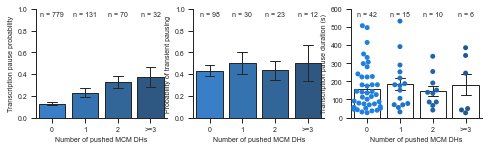

In [34]:
protein = 'MCM'
fig,axes = plt.subplots(1,3,figsize=(8,2))

# Pausing probability

sns.barplot(x='number_MCM_DH',y='number_pauses',data=df_pause,order='0 1 2 >=3'.split(),
            palette=palettes[protein],lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes[0], 
            n_boot=10000, seed=42, ci=68, errcolor='.15')
axes[0].set_xlabel('Number of pushed MCM DHs')
axes[0].set_ylabel('Transcription pause probability')
#axes.set_title(f'T7 pause frequency')
axes[0].set_ylim([0,1])
#calculate number of observations
nobs = df_pause['number_MCM_DH'].value_counts().sort_index()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

#put nobs into plot
pos = range(len(nobs))
for tick,label in zip(pos,axes[2].get_xticklabels()):
    transform=axes[0].transAxes,axes[0].text(pos[tick], 0.95, nobs[tick],
    horizontalalignment='center',verticalalignment='center')
    
# Pause recovery

sns.barplot(x='number_MCM_DH',y='recovery_bin', data=_plot_df,
            order=sorted(df_pause['number_MCM_DH'].unique()), palette=palettes[protein],
            lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes[1], 
            n_boot=10000, seed=42, ci=68, errcolor='.15')

axes[1].set_ylim(0,1)
axes[1].set_xlabel('Number of pushed MCM DHs')
axes[1].set_ylabel('Probability of transient pausing')
#axes.set_title('Recovery from transcription pauses')

#calculate number of observations
nobs = _plot_df['number_MCM_DH'].value_counts().sort_index()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

#put nobs into plot
pos = range(len(nobs))

for tick,label in zip(pos,axes[2].get_xticklabels()):
    transform=axes[1].transAxes, axes[1].text(pos[tick], 0.95, nobs[tick],
    horizontalalignment='center',verticalalignment='center')

    
# Pause recovery
 
sns.swarmplot(x='number_MCM_DH',y='duration', data=_plot_df[_plot_df['recovery']],
              order=sorted(df_pause['number_MCM_DH'].unique()), palette=palettes[protein], ax=axes[2])
sns.barplot(x='number_MCM_DH',y='duration', data=_plot_df[_plot_df['recovery']],
            order=sorted(df_pause['number_MCM_DH'].unique()), palette=palettes[protein], facecolor=(1, 1, 1, 0),
            lw=1, edgecolor='.15', capsize=.3,errwidth=1, ax=axes[2], 
            n_boot=10000, seed=42, ci=68, errcolor='.15')

axes[2].set_ylim(0,600)
axes[2].set_xlabel('Number of pushed MCM DHs')
axes[2].set_ylabel('Transcription pause duration (s)')
#axes.set_title('Recovery from transcription pauses')

#calculate number of observations
nobs = _plot_df[_plot_df['recovery']]['number_MCM_DH'].value_counts().sort_index()
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n = " + i for i in nobs]

#put nobs into plot
pos = range(len(nobs))

for tick,label in zip(pos,axes[2].get_xticklabels()):
    transform=axes[2].transAxes, axes[2].text(pos[tick], 570, nobs[tick],
    horizontalalignment='center',verticalalignment='center')

sns.despine()
#plt.tight_layout()

plt.savefig(dir_out+'S3G-I_Pause_probability_recovery_duration_vs_#MCM.svg',transparent=True)